In [1]:
%run HCPHydroDFG5Base_Project2020_CC_AdultRev_UMass.ipynb

# Compare MATLAB and Python results

In [14]:
#comment out all but desired scenario for comparison

# myFiles = ['Historical_SIM.csv']
# myFiles = ['Weather_WBM_dT=2_dP=100_R1270_dCV=1.1.csv']
# myFiles = ['Weather_WBM_dT=2_dP=100_R1956_dCV=1.1.csv']
# myFiles = ['Weather_WBM_dT=2_dP=100_R1987_dCV=1.1.csv']
# myFiles = ['Weather_WBM_dT=2_dP=100_R2770_dCV=1.1.csv']
myFiles = ['Weather_WBM_dT=2_dP=100_R3449_dCV=1.1.csv']
# myFiles = ['Weather_WBM_dT=2_dP=100_R3515_dCV=1.1.csv']

Same number of output files in Python and MATLAB.


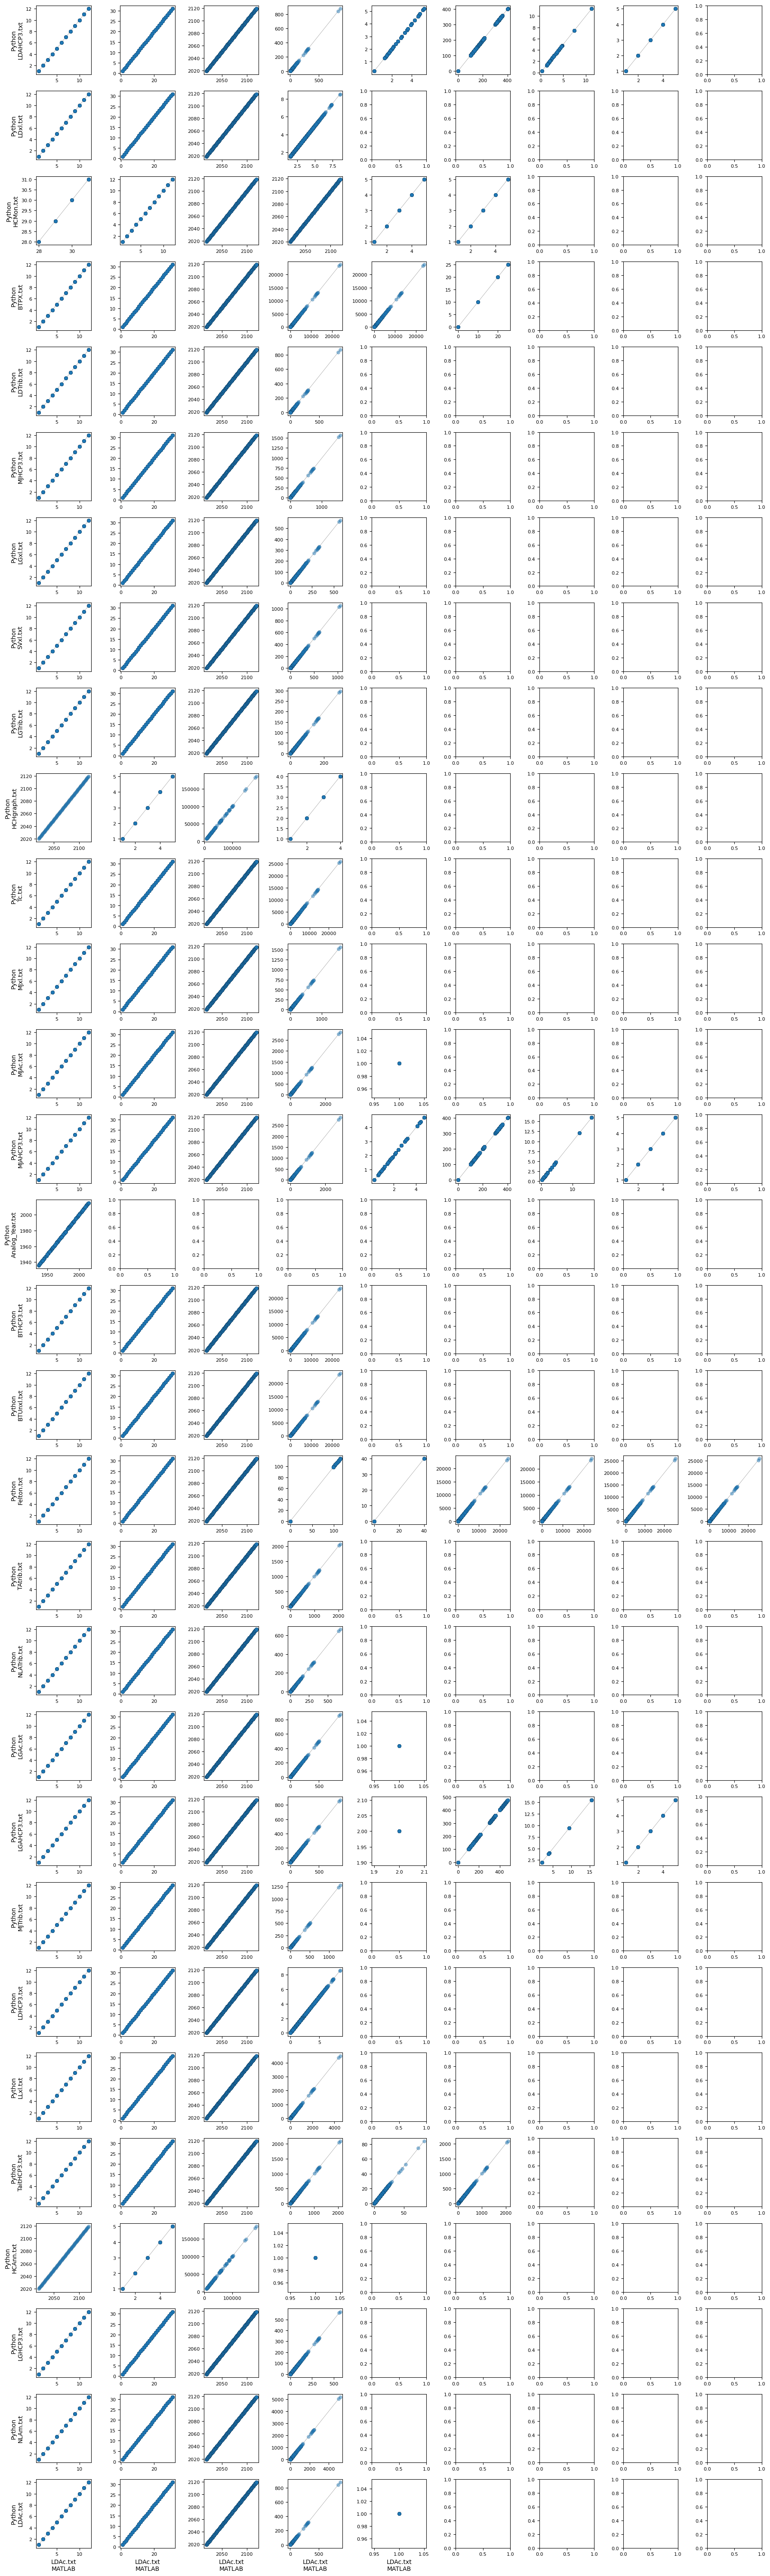

In [15]:
# define folders where MATLAB and Python results are saved
dir_python = '/Users/samanderson/repos/santa_cruz/Python/Output_HISTORICAL_SIM_Python/' + myFiles[0][:-4] + '/'
dir_matlab = '/Users/samanderson/repos/santa_cruz/MATLAB/Output HISTORICAL SIM/' + myFiles[0][:-4] + '/'

files_python = os.listdir(dir_python)
files_matlab = os.listdir(dir_matlab)

# check for same number of files
if len(files_python) == len(files_matlab):
    print('Same number of output files in Python and MATLAB.')
else:
    print('ERROR: Different number of output files in Python and MATLAB')

N_files = len(files_python)
N_vars_max = 1

# open each file and compare variables
for file in files_python:
    
    fullfile_python = dir_python + file
    fullfile_matlab = dir_matlab + file

    data_python = np.loadtxt(fullfile_python, delimiter = ' ')
    data_matlab = np.loadtxt(fullfile_matlab, delimiter = ',')

    #compare shape of files
    if np.shape(data_python) != np.shape(data_matlab):
        print('ERROR: MATLAB and Python data files have different shapes')
        print('\t' + file)
        print('\t\tMATLAB shape: ' + str(np.shape(data_matlab)))
        print('\t\tPython shape: ' + str(np.shape(data_python)))

    if len(np.shape(data_python)) == 1:
        N_dims = np.shape(data_python)[0]
        N_vars = 1
    else:
        N_dims = np.shape(data_python)[0]
        N_vars = np.shape(data_python)[1]

    if N_vars > N_vars_max:
        N_vars_max = N_vars

# plot the MATLAB and Python variables from each file
fig, axes = plt.subplots(nrows = N_files, ncols = N_vars_max, figsize = (2*N_vars_max,2*N_files))

for kk_file, file in enumerate(files_python):
    
    fullfile_python = dir_python + file
    fullfile_matlab = dir_matlab + file

    data_python = np.loadtxt(fullfile_python, delimiter = ' ')
    data_matlab = np.loadtxt(fullfile_matlab, delimiter = ',')

    if len(np.shape(data_python)) == 1:
        N_dims = np.shape(data_python)[0]
        N_vars = 1
    else:
        N_dims = np.shape(data_python)[0]
        N_vars = np.shape(data_python)[1]

    for kk_var in range(N_vars):

        if N_vars > 1:
            x = data_matlab[:,kk_var]
            y = data_python[:,kk_var]
        else:
            x = data_matlab
            y = data_python
            
        left = np.min([x,y])
        right = np.max([x,y])
        axes[kk_file,kk_var].plot([right, left],[right,left], 'k', linewidth = 0.2, zorder = 0)
        axes[kk_file,kk_var].scatter(x,y, alpha = 0.5, edgecolor = 'k', linewidth = 0.1)
        if kk_var == 0:
            axes[kk_file,kk_var].set_ylabel('Python\n' + file)
        if kk_file == N_files-1:
            axes[kk_file,kk_var].set_xlabel(file + '\nMATLAB')
    for kk_var in range(N_vars_max):
        axes[kk_file,kk_var].tick_params(labelsize = 8)

plt.tight_layout()

# plt.savefig('HISTORICAL_SIM_matlab_python_comparison.png', dpi = 400, bbox_inches = 'tight')
# plt.savefig('Weather_WBM_dT=2_dP=100_R1270_dCV=1.1_matlab_python_comparison.png', dpi = 400, bbox_inches = 'tight')       
# plt.savefig(myFiles[0][:-4]+'_matlab_python_comparison.png', dpi = 400, bbox_inches = 'tight')   